<a href="https://colab.research.google.com/github/leoquiroa/Prophet/blob/master/RevenuePerDoctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

from datetime import date
import holidays

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

Read file


In [0]:
url = 'https://raw.githubusercontent.com/leoquiroa/Prophet/master/data/daily_revenue_doctor.csv'
df_doc = pd.read_csv(
    url, 
    nrows=4167,
    names = ['ds','cat','y'], 
    parse_dates = True )
df_doc['ds'] = pd.to_datetime(df_doc['ds'])

Filter by

In [143]:
name_doc = 'Robert Caputo'
df_filter = df_doc[df_doc['cat'] == name_doc][['ds','y']].reset_index(drop=True)
df_filter.shape

(1389, 2)

Split

In [149]:
date_start_test = '2019-07-01'
split_point = df_filter[df_filter['ds']==date_start_test].index[0]
train = df_filter[:split_point]
test = df_filter[split_point:]
print(split_point)
print(train.shape)
print(test.shape)

1232
(1232, 2)
(157, 2)


Fit Model


In [153]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=28, freq='d')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


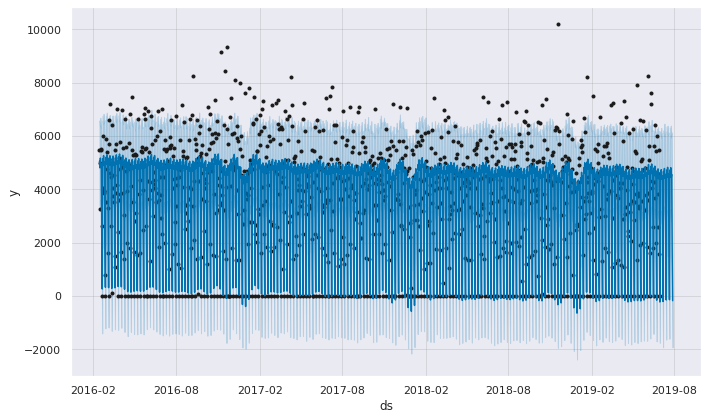

In [154]:
fig = m.plot(forecast)

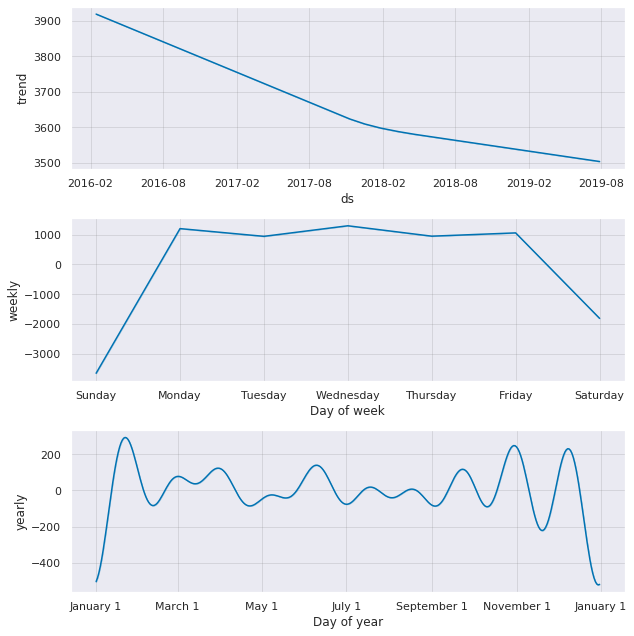

In [155]:
fig_decompose = m.plot_components(forecast)

In [0]:
def compare_dates(date_begin, date_end, data):
  yhat = forecast[(forecast['ds'] >= date_begin) & (forecast['ds'] <= date_end)][['ds','yhat']][['ds','yhat']]
  yreal = data[(data['ds'] >= date_begin) & (data['ds'] <= date_end)]
  merged_inner = pd.merge(left=yreal,right=yhat, left_on='ds', right_on='ds')
  return merged_inner

In [160]:
compare_dates('2019-07-02', '2019-07-06', test)

,ds,y,yhat
0,2019-07-02,4166.43,4379.261961
1,2019-07-03,4183.69,4736.271230
2,2019-07-04,0.00,4389.116727
3,2019-07-05,3338.40,4504.644280
4,2019-07-06,1874.83,1633.851616


Holidays

In [0]:
us_holidays = holidays.UnitedStates()
mylist = []
for date, name in sorted(holidays.US(years=[2016,2017,2018,2019]).items()):
  mylist.append((name,date,0,0))
df_holidays = pd.DataFrame(mylist, columns = ['holiday' , 'ds', 'lower_window' , 'upper_window'])

Fit Model

In [0]:
m = Prophet(holidays=df_holidays,daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)
future = m.make_future_dataframe(periods=28, freq='d')
forecast = m.predict(future)

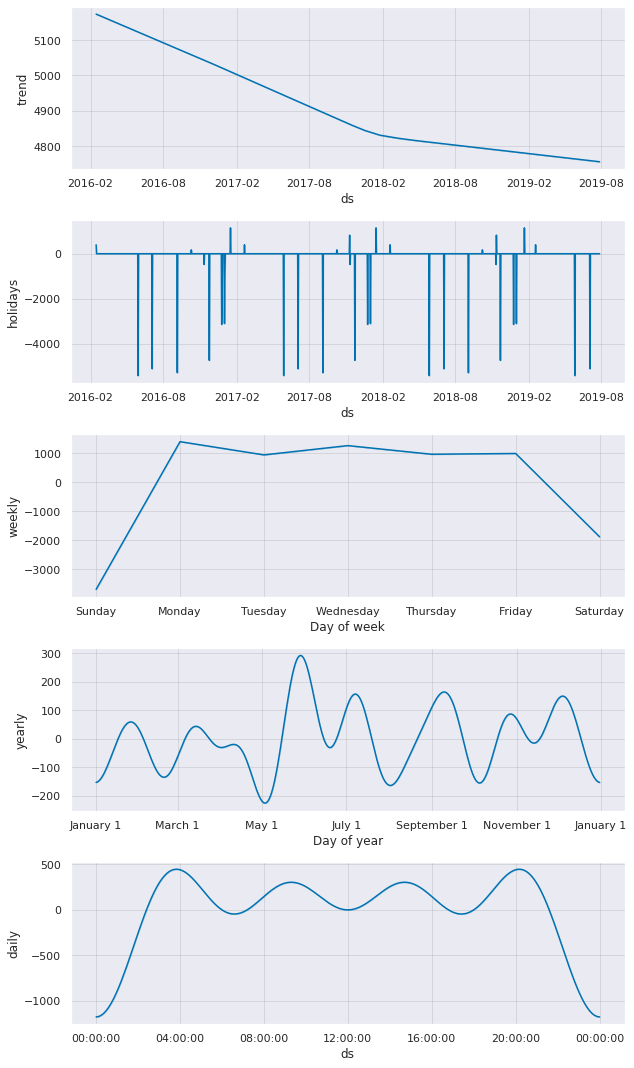

In [172]:
fig_decompose = m.plot_components(forecast)

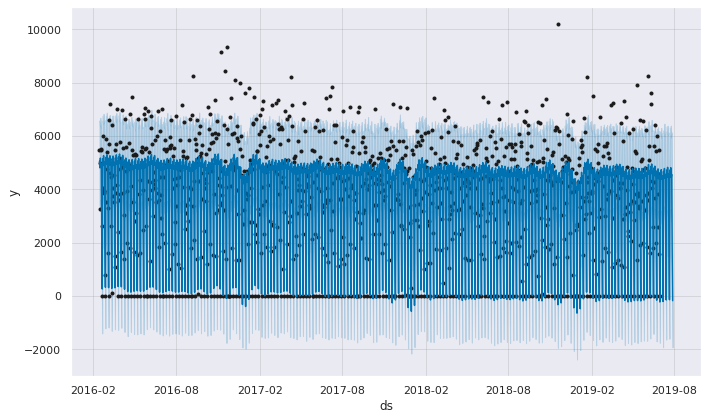

In [166]:
fig = m.plot(forecast)

In [173]:
compare_dates('2019-07-02', '2019-07-06', test)

,ds,y,yhat
0,2019-07-02,4166.43,4643.498570
1,2019-07-03,4183.69,4975.756160
2,2019-07-04,0.00,-436.833319
3,2019-07-05,3338.40,4723.869639
4,2019-07-06,1874.83,1857.664766
